Process for considering text as numerical is same as the earlier methods logisticRegression and KNN.
1)import the model
2)Instantiate it
3)fit the model
4)Transform the model rather than predicting it.

In [1]:
#example text for model training
simple_train=['call you tonight','call me a cab','please call me']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vect =CountVectorizer()

In [3]:
#learn the 'vocablary of the traing data (occurs in-place)
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
#examine the fitted vocablary
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [5]:
#Transform training data into a 'document-term-matrix'
simple_train_dtm=vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [6]:
#converting sparse matrix into dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0]], dtype=int64)

In [7]:
import pandas as pd

In [8]:
pd.DataFrame(simple_train_dtm.toarray(),columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,1,0,0


# Vectorisation is a process of turning a collection of text documents into numerical feature vectors

In [9]:
#example test for model testing
simple_test=["please dont call me"]

In [10]:
#transforming testing data into a document-term matrix
simple_test_dtm=vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [11]:
#examine the vocablary and document-term matrix
pd.DataFrame(simple_test_dtm.toarray(),columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


# summary
vect.fit(train) learns the vocablary  of training data
vect.transform(train) uses the fitted vocablary to build a document term matrix frm the traing data
vect.transform(test) uses the fitted vocablary to build a document term matrix from testing data(and ignore tokens it ha snever seen before)

In [12]:
import pandas as pd
url='https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
sms=pd.read_table(url,sep='\t',header=None,names=['label','message'])

In [13]:
sms.shape

(5572, 2)

In [14]:
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [15]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
y=sms.label.value_counts()

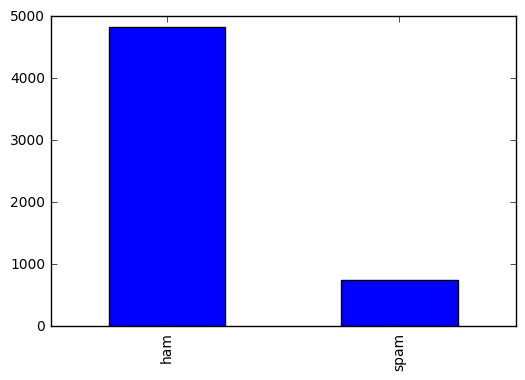

In [18]:
y.plot(kind='bar')

In [19]:
sms['label_num']=sms.label.map({'ham':0,'spam':1})

In [20]:
sms.shape

(5572, 3)

In [21]:
sms.head(5)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [23]:
x=sms.message

In [24]:
y=sms.label_num

In [25]:
print(x.shape)
print(y.shape)

(5572,)
(5572,)


In [27]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [28]:
# instantiate the vectorizer
vect = CountVectorizer()

In [29]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [30]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [31]:
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [32]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work

In [33]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [34]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 136 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [36]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)